In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

- iris 데이터 종 예측

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt




In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [11]:
#1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# 독립변수와 종속변수 분리 종속변수 원핫 인코딩
iris_X = iris.iloc[:,:-1].to_numpy()
iris_y = iris.iloc[:,-1]

#원핫인코딩
iris_Y= pd.get_dummies(iris_y).values
iris_Y

# 훈련셋과 테스트 셋 분리
X_train, X_test ,Y_train, Y_test = train_test_split(iris_X,iris_Y,
                                                   test_size=0.2,
                                                   random_state=1,
                                                   stratify=iris_Y)
X_train.shape, X_test.shape ,Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [16]:
#2. 모델구성하기(입력 4 - 출력 3)
model=Sequential()
model.add(Dense(units=60, input_dim=4, activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.summary()
          

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 60)                300       
                                                                 
 dense_17 (Dense)            (None, 50)                3050      
                                                                 
 dense_18 (Dense)            (None, 30)                1530      
                                                                 
 dense_19 (Dense)            (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________


In [22]:
#2. 모델구성하기(입력 4 - 출력 3)
model=Sequential([
    Input(4,),
    Dense(units=60,activation='relu'),
    Dense(units=50,activation='relu'),
    Dense(units=30,activation='relu'),
    Dense(units=3,activation='softmax')  
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 60)                300       
                                                                 
 dense_21 (Dense)            (None, 50)                3050      
                                                                 
 dense_22 (Dense)            (None, 30)                1530      
                                                                 
 dense_23 (Dense)            (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 3. 모델학습과정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [56]:
# 4. 학습 : epoch 마다 val_accuracy(val_loss, accuracy,loss)값이 좋을때 모델을 자동저장 callback 추가
            # 모델을 저장할 경로:./model/iris-100-val0.6521.h5
import os
model_save_folder ='./model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder) # model_save_folder가 없으면 폴더 생성
# 조기 종료 콜백
earlystopping = EarlyStopping(patience=40)
# 모델 자동 저장 콜백
file = model_save_folder+'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint= ModelCheckpoint(filepath= file, #저장경로
                           monitor='val_loss', #모티터링지표
                            save_best_only=True, # 지표가 개선된 경우만 저장.False면 매번 저장
                            mode= 'auto', #값이 클수록 저장.'min'은 값이 작을수록 저장. auto
                            verbose=1
                           )

hist = model.fit(X_train,Y_train,
                #batch_size=50, # 한배치사이즈마다 w,b조정,
                 epochs=300,
                 validation_split=0.2,
                 callbacks=[checkpoint,earlystopping]
                 )

Epoch 1/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1415 - accuracy: 0.9688
Epoch 1: val_loss improved from inf to 0.04074, saving model to ./model\iris-001-val1.0000.h5
3/3 [==============================] - 0s 40ms/step - loss: 0.0734 - accuracy: 0.9792 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 2/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0786 - accuracy: 0.9688
Epoch 2: val_loss did not improve from 0.04074
3/3 [==============================] - 0s 17ms/step - loss: 0.1080 - accuracy: 0.9375 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 3/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0947 - accuracy: 0.9688
Epoch 3: val_loss did not improve from 0.04074
3/3 [==============================] - 0s 15ms/step - loss: 0.0983 - accuracy: 0.9583 - val_loss: 0.0410 - val_accuracy: 0.9583
Epoch 4/300
1/3 [=========>....................] - ETA: 0s - loss: 0.1641 - accuracy: 0.9688
Epoch 4: val_loss improved from 0.04074 to 0.02916, savi

Epoch 31/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 31: val_loss did not improve from 0.02445
3/3 [==============================] - 0s 15ms/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 32/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - accuracy: 1.0000
Epoch 32: val_loss did not improve from 0.02445
3/3 [==============================] - 0s 15ms/step - loss: 0.0664 - accuracy: 0.9792 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 33/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0268 - accuracy: 1.0000
Epoch 33: val_loss did not improve from 0.02445
3/3 [==============================] - 0s 16ms/step - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 34/300
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 34: val_loss did not improve from 0.02445
3/3 [==============================] - 0s 17ms/s

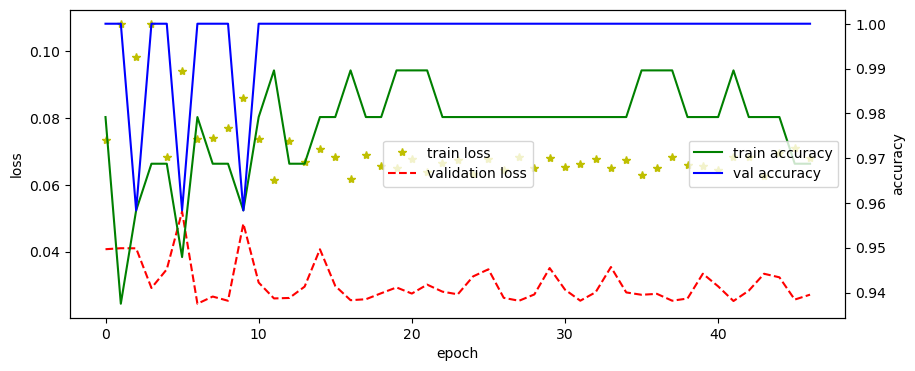

In [63]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'],'y*',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r--',label='validation loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'],'g',label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center')
acc_ax.legend(loc='center right')
plt.show()

In [58]:
# 모델평가
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - accuracy: 1.0000


[0.004564077593386173, 1.0]

In [62]:
# 교차표 ctab
real = np.argmax(Y_test,axis=1)
pred = np.argmax(model2.predict(X_test),axis=1)
ctab =pd.crosstab(real,pred)


ctab.columns=list(iris['species'][::50])
ctab.columns.name='predict'
ctab.index=iris['species'][::50]
ctab.index.name='real'
ctab

1/1 [==============================] - 0s 56ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


In [61]:
# 저장된 모델 중 성능이 제일 좋은 파일 load
from tensorflow.keras.models import load_model
model2=load_model('./model/iris-007-val1.0000.h5')
model2.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.0055 - accuracy: 1.0000


[0.005459693260490894, 1.0]

In [70]:
# 모델사용하기(예측하기)
iris[100:101]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica


In [71]:
model.predict(np.array([[6.3,3.3,6,2.5]]))

1/1 [==============================] - 0s 22ms/step


array([[8.7288388e-10, 3.0492689e-05, 9.9996948e-01]], dtype=float32)